DATA LOADED SUCCESSFULLY
Cluster 0: 200 trades
Cluster 1: 93 trades
Cluster 2: 76 trades
Cluster 3: 61 trades
Total trades: 430
PREPARING DATA - Adding Features
 All features added successfully!
METHOD 1: INDICATOR CONDITION ANALYSIS
Purpose: Infer strategy type (Trend/Mean-Reversion/Breakout/Volatility)

CLUSTER 0

ENTRY INDICATOR AVERAGES:
   RSI(14):    49.5  (Neutral 30-70)
   ATR(14):    3.28
   ADX(14):    24.9  (Weak/Range <25)
   StochK(14): 48.1  (Neutral)
   MACD:       -0.1429  (Bearish)
   DI Spread:  -1.0  (Neutral)

 STRATEGY TYPE INFERENCE:
   • NEUTRAL RSI (flexible entry)
   • RANGE TRADING (low trend strength)

CLUSTER 1

ENTRY INDICATOR AVERAGES:
   RSI(14):    36.0  (Neutral 30-70)
   ATR(14):    2.73
   ADX(14):    42.6  (Strong Trend >40)
   StochK(14): 25.8  (Neutral)
   MACD:       -2.3544  (Bearish)
   DI Spread:  -15.9  (Bearish -DI dominant)

 STRATEGY TYPE INFERENCE:
   • NEUTRAL RSI (flexible entry)
   • TREND-FOLLOWING (requires strong trend)
   • OVERSOLD

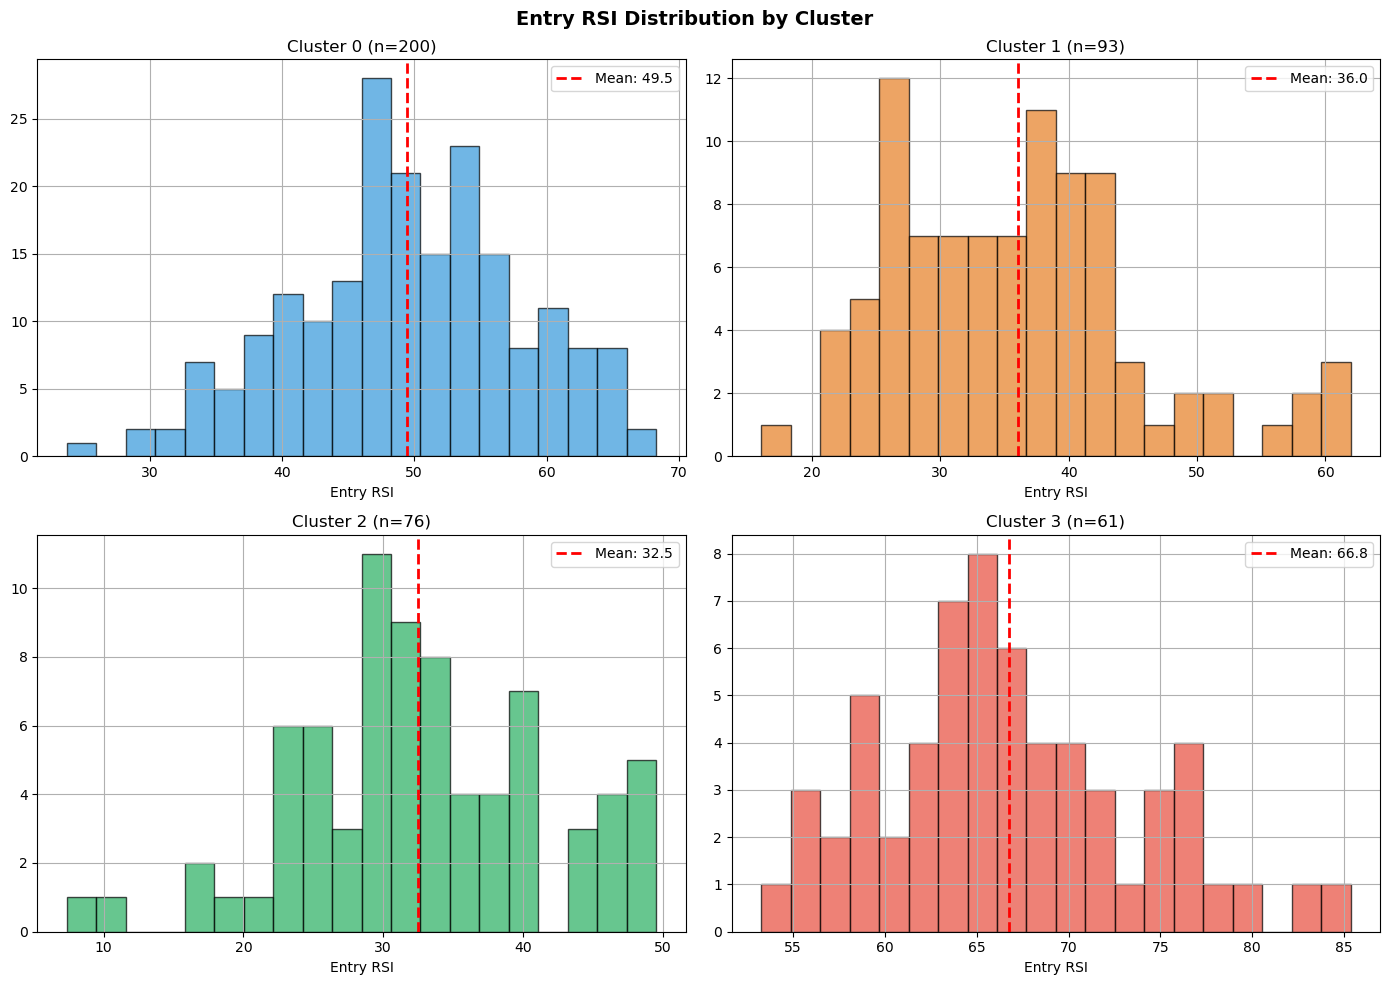

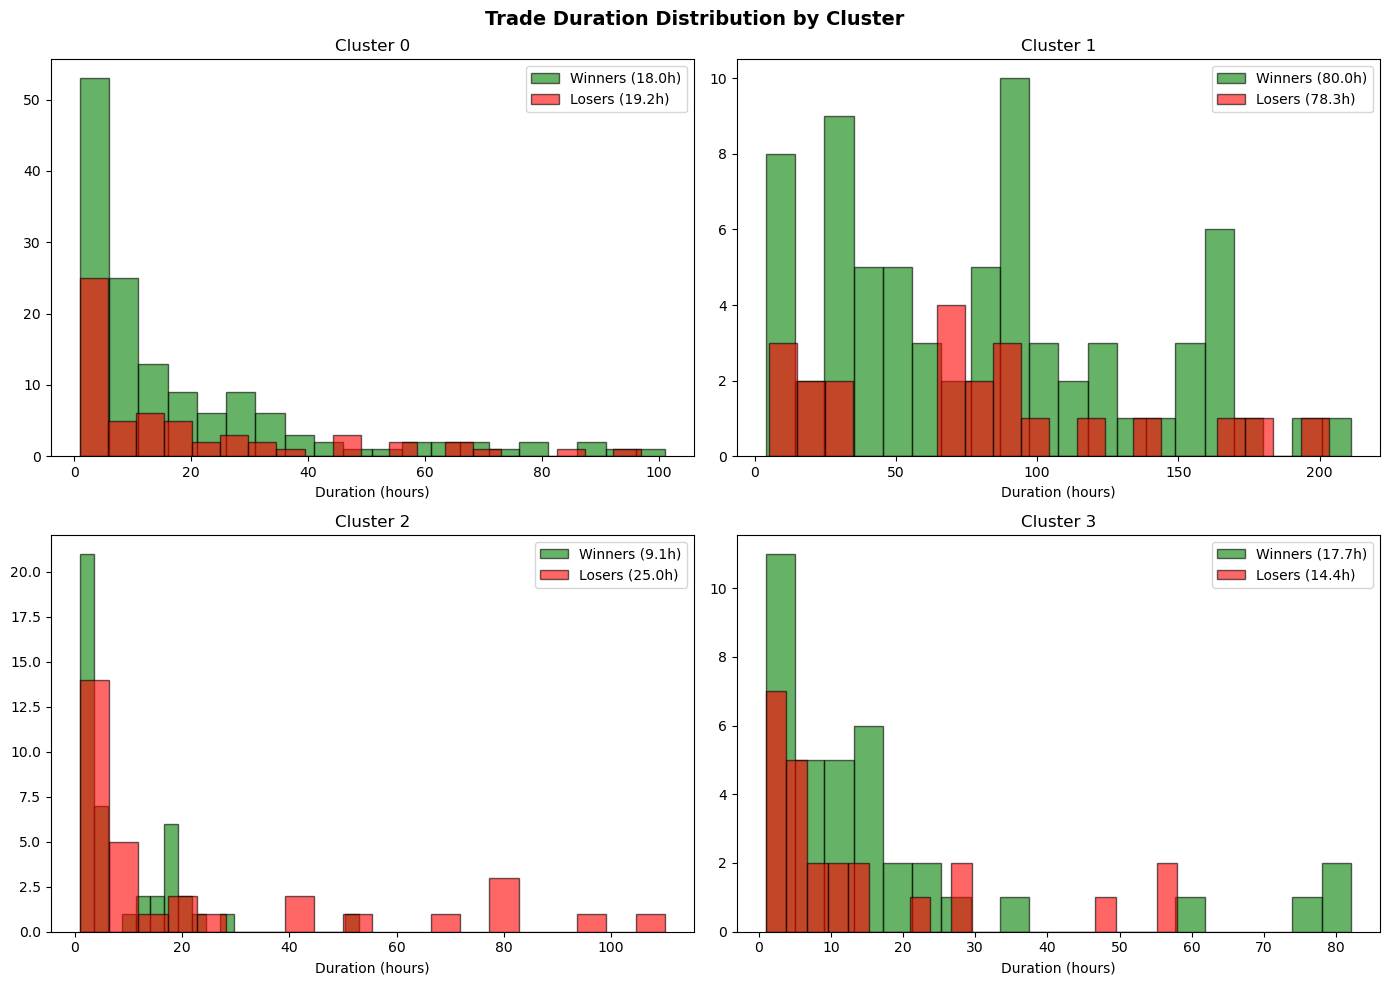

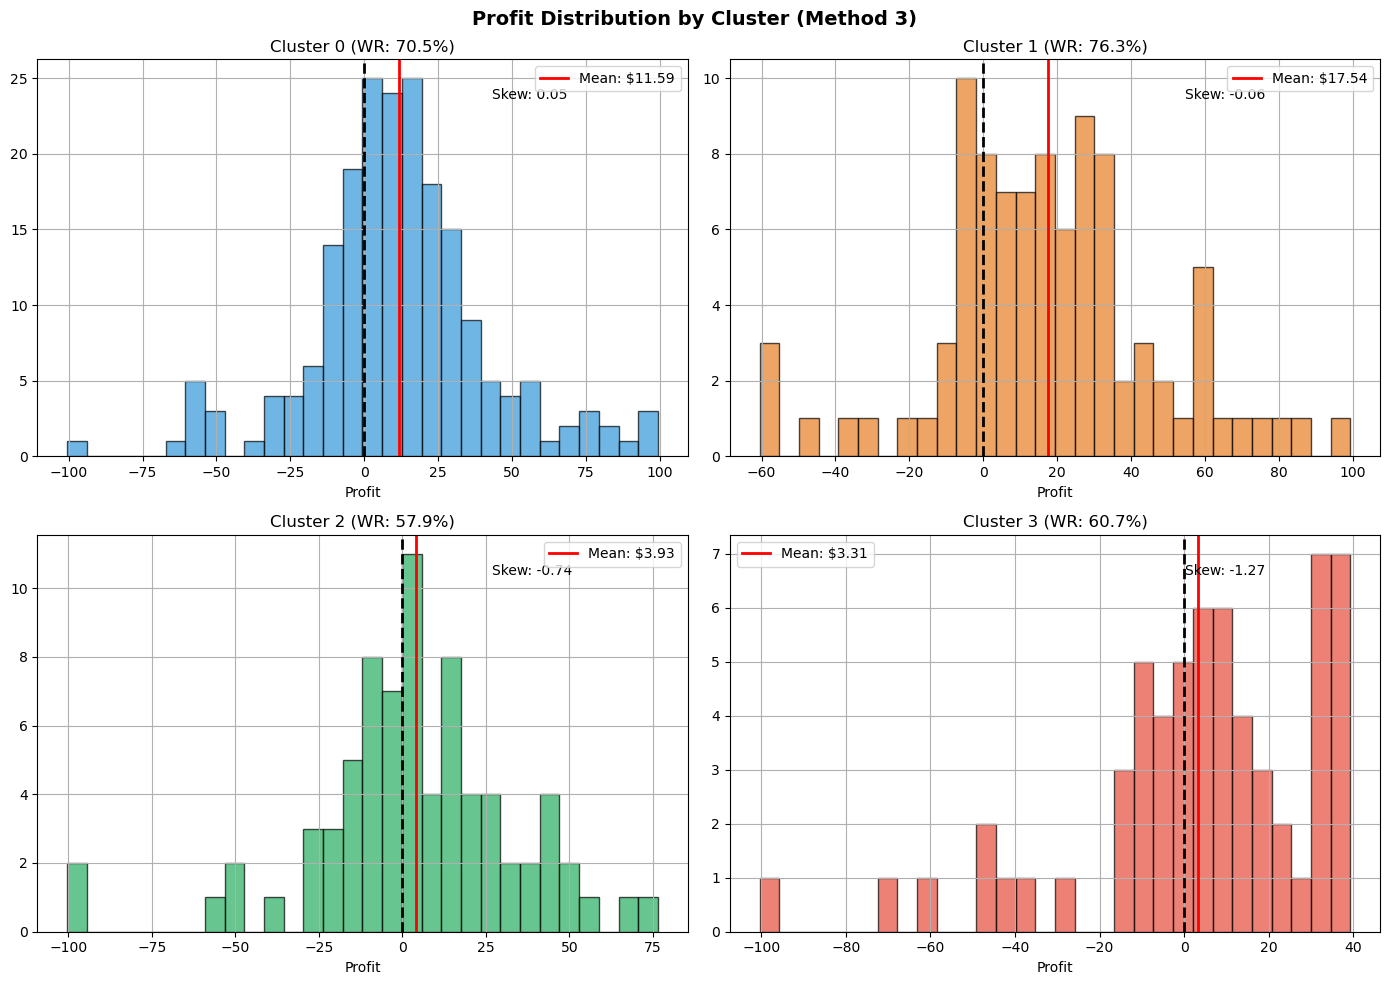

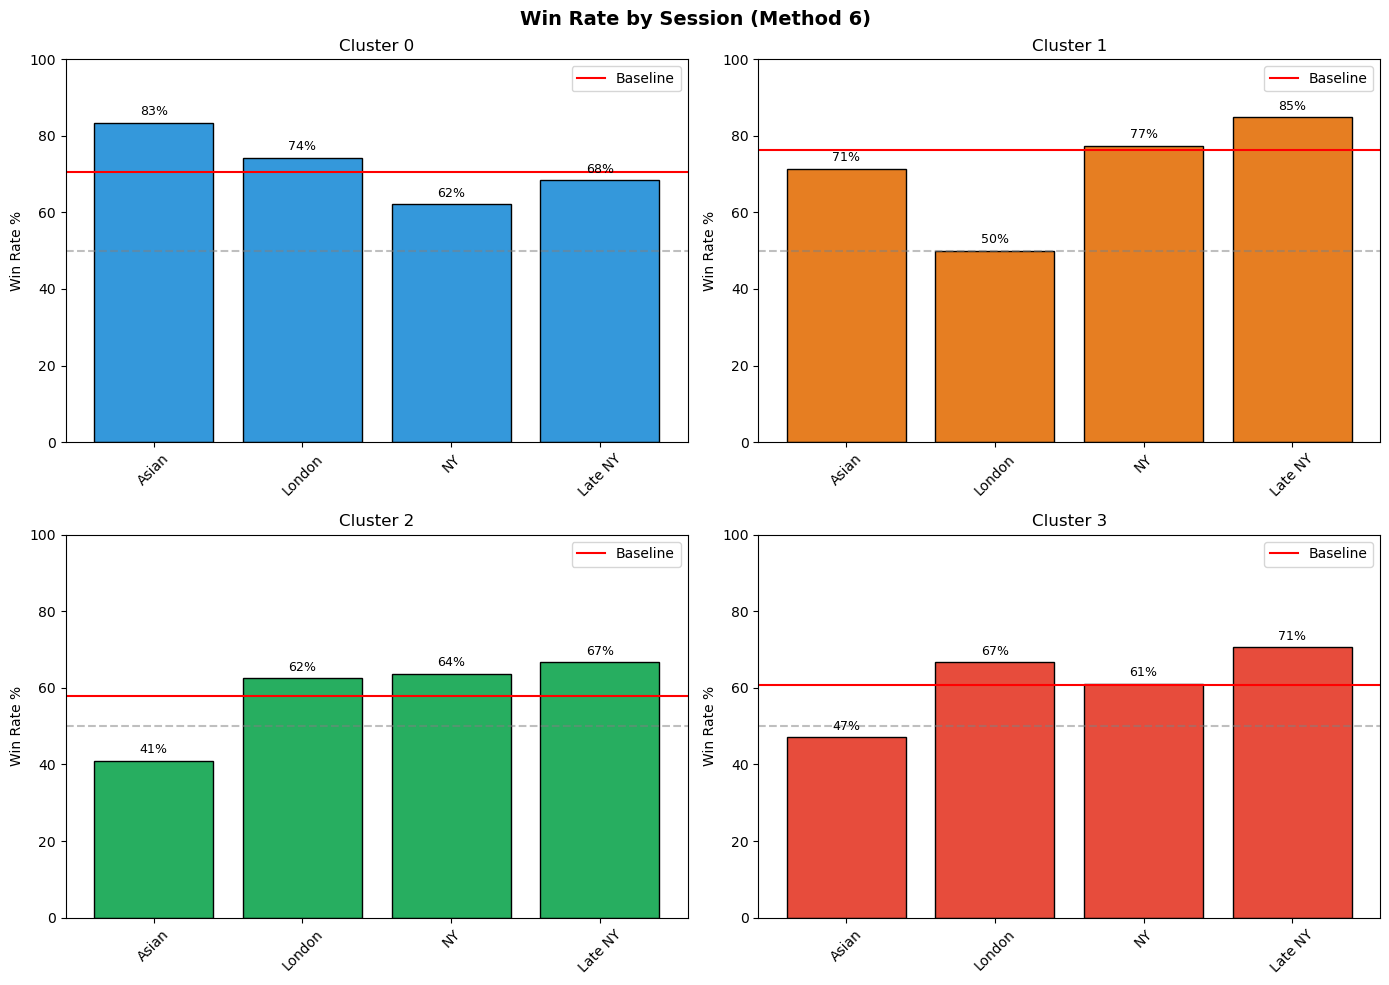

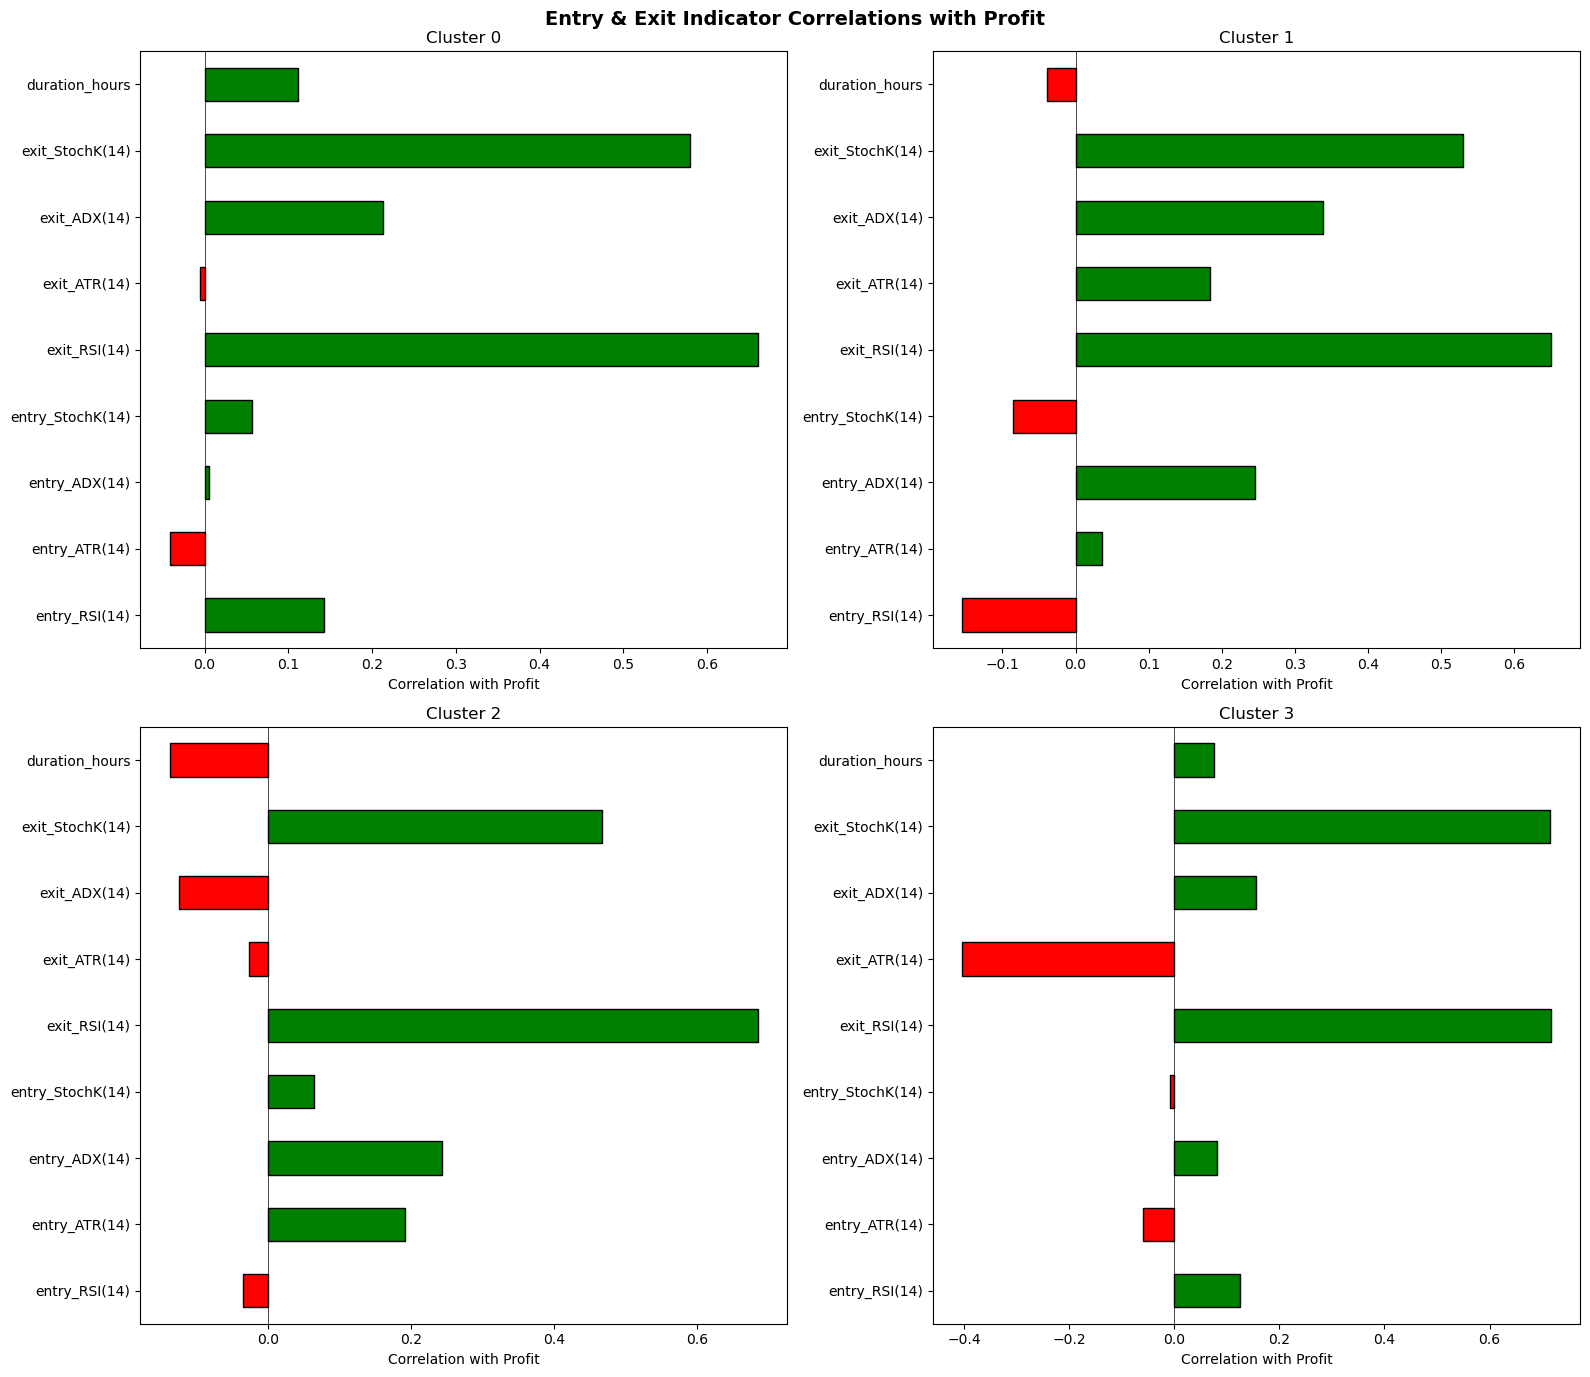


                    FINAL 7-METHOD ANALYSIS SUMMARY

 STRATEGY SUMMARY TABLE:
  Cluster        Strategy  Trades Win_Rate Avg_Profit Entry_RSI Entry_ADX Entry_ATR Avg_Duration    Best_Session Exit_RSI_Target Exit_StochK_Target
Cluster 0    RANGE TRADER     200    70.5%     $11.59      49.5      24.9      3.28        18.3h     Asian (0-8)              64                 80
Cluster 1  TREND FOLLOWER      93    76.3%     $17.54      36.0      42.6      2.73        79.6h Late NY (17-24)              65                 81
Cluster 2 BREAKOUT TRADER      76    57.9%      $3.93      32.5      41.6      6.65        15.8h Late NY (17-24)              59                 77
Cluster 3 MOMENTUM TRADER      61    60.7%      $3.31      66.8      44.2      3.62        16.4h Late NY (17-24)              66                 84

 Summary saved to 'seven_method_summary.csv'

STRATEGY CARDS

     CLUSTER 0: RANGE TRADER / INTRADAY SCALPER
     Entry: ADX < 25, RSI ~50, neutral conditions
     Best Time: Asia

In [11]:
# =============================================================================
# COMPLETE 7-METHOD ANALYSIS & HIDDEN PATTERN DETECTION
# warning my self first do it in visual code jupyter became too booring 
# =============================================================================

#  Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, skew, kurtosis
from math import pi
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Load all cluster data
cluster_0 = pd.read_csv('cluster_0_trades.csv')
cluster_1 = pd.read_csv('cluster_1_trades.csv')
cluster_2 = pd.read_csv('cluster_2_trades.csv')
cluster_3 = pd.read_csv('cluster_3_trades.csv')

clusters = {'Cluster 0': cluster_0, 'Cluster 1': cluster_1, 
            'Cluster 2': cluster_2, 'Cluster 3': cluster_3}

# Display basic info
print("=" * 60)
print("DATA LOADED SUCCESSFULLY")
print("=" * 60)
print(f"Cluster 0: {len(cluster_0)} trades")
print(f"Cluster 1: {len(cluster_1)} trades")
print(f"Cluster 2: {len(cluster_2)} trades")
print(f"Cluster 3: {len(cluster_3)} trades")
print(f"Total trades: {sum(len(df) for df in clusters.values())}")

# Prepare Data - Add All Features
print("=" * 60)
print("PREPARING DATA - Adding Features")
print("=" * 60)

for name, df in clusters.items():
    # Time features
    df['entry_time'] = pd.to_datetime(df['entry_time'])
    df['exit_time'] = pd.to_datetime(df['exit_time'])
    df['entry_hour'] = df['entry_time'].dt.hour
    df['exit_hour'] = df['exit_time'].dt.hour
    df['entry_dayofweek'] = df['entry_time'].dt.dayofweek
    df['exit_dayofweek'] = df['exit_time'].dt.dayofweek
    df['entry_day_name'] = df['entry_time'].dt.day_name()
    df['exit_day_name'] = df['exit_time'].dt.day_name()
    
    # Session classification
    def classify_session(hour):
        if 0 <= hour < 8:
            return 'Asian (0-8)'
        elif 8 <= hour < 12:
            return 'London Open (8-12)'
        elif 12 <= hour < 17:
            return 'NY Overlap (12-17)'
        else:
            return 'Late NY (17-24)'
    
    df['entry_session'] = df['entry_hour'].apply(classify_session)
    df['exit_session'] = df['exit_hour'].apply(classify_session)
    
    # Indicator changes (Exit - Entry)
    df['RSI_change'] = df['exit_RSI(14)'] - df['entry_RSI(14)']
    df['ATR_change'] = df['exit_ATR(14)'] - df['entry_ATR(14)']
    df['ADX_change'] = df['exit_ADX(14)'] - df['entry_ADX(14)']
    df['MACD_change'] = df['exit_MACD Main'] - df['entry_MACD Main']
    df['StochK_change'] = df['exit_StochK(14)'] - df['entry_StochK(14)']
    df['plusDI_change'] = df['exit_plusDI(14)'] - df['entry_plusDI(14)']
    df['minusDI_change'] = df['exit_minusDI(14)'] - df['entry_minusDI(14)']
    
    # DI spread (trend direction)
    df['entry_DI_spread'] = df['entry_plusDI(14)'] - df['entry_minusDI(14)']
    df['exit_DI_spread'] = df['exit_plusDI(14)'] - df['exit_minusDI(14)']
    df['DI_spread_change'] = df['exit_DI_spread'] - df['entry_DI_spread']
    
    # Bollinger Band position
    df['entry_BB_position'] = (df['entry_price'] - df['entry_BB_Lower']) / (df['entry_BB_Upper'] - df['entry_BB_Lower'])
    df['exit_BB_position'] = (df['exit_price'] - df['exit_BB_Lower']) / (df['exit_BB_Upper'] - df['exit_BB_Lower'])

print(" All features added successfully!")

# Indicator Condition Analysis
print("=" * 80)
print("METHOD 1: INDICATOR CONDITION ANALYSIS")
print("Purpose: Infer strategy type (Trend/Mean-Reversion/Breakout/Volatility)")
print("=" * 80)

method1_results = {}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    rsi = df['entry_RSI(14)'].mean()
    atr = df['entry_ATR(14)'].mean()
    adx = df['entry_ADX(14)'].mean()
    stochk = df['entry_StochK(14)'].mean()
    macd = df['entry_MACD Main'].mean()
    di_spread = df['entry_DI_spread'].mean()
    
    print(f"\nENTRY INDICATOR AVERAGES:")
    print(f"   RSI(14):    {rsi:.1f}  {'(Oversold <30)' if rsi < 30 else '(Overbought >70)' if rsi > 70 else '(Neutral 30-70)'}")
    print(f"   ATR(14):    {atr:.2f}")
    print(f"   ADX(14):    {adx:.1f}  {'(Strong Trend >40)' if adx > 40 else '(Moderate 25-40)' if adx > 25 else '(Weak/Range <25)'}")
    print(f"   StochK(14): {stochk:.1f}  {'(Oversold <20)' if stochk < 20 else '(Overbought >80)' if stochk > 80 else '(Neutral)'}")
    print(f"   MACD:       {macd:.4f}  {'(Bullish)' if macd > 0 else '(Bearish)'}")
    print(f"   DI Spread:  {di_spread:.1f}  {'(Bullish +DI dominant)' if di_spread > 5 else '(Bearish -DI dominant)' if di_spread < -5 else '(Neutral)'}")
    
    # Strategy inference
    strategies = []
    
    if rsi < 35:
        strategies.append("MEAN REVERSION (buys oversold)")
    elif rsi > 65:
        strategies.append("MOMENTUM CONTINUATION (buys strength)")
    else:
        strategies.append("NEUTRAL RSI (flexible entry)")
    
    if adx > 40:
        strategies.append("TREND-FOLLOWING (requires strong trend)")
    elif adx < 25:
        strategies.append("RANGE TRADING (low trend strength)")
    else:
        strategies.append("MODERATE TREND (flexible)")
    
    if stochk < 30:
        strategies.append("OVERSOLD ENTRY (mean reversion)")
    elif stochk > 70:
        strategies.append("OVERBOUGHT ENTRY (breakout/momentum)")
    
    print(f"\n STRATEGY TYPE INFERENCE:")
    for s in strategies:
        print(f"   • {s}")
    
    method1_results[name] = {
        'RSI': rsi, 'ATR': atr, 'ADX': adx, 'StochK': stochk,
        'MACD': macd, 'DI_Spread': di_spread, 'strategies': strategies
    }

# Volatility & Market Regime Inference
print("\n" + "=" * 80)
print("METHOD 2: VOLATILITY & MARKET REGIME INFERENCE")
print("Using ATR and ADX to classify market conditions")
print("=" * 80)

# Calculate ATR percentiles across all data
all_atr = pd.concat([df['entry_ATR(14)'] for df in clusters.values()])
atr_median = all_atr.median()
atr_q75 = all_atr.quantile(0.75)

method2_results = {}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    atr = df['entry_ATR(14)'].mean()
    adx = df['entry_ADX(14)'].mean()
    
    # Classify regime
    if atr < atr_median:
        atr_class = "LOW"
    elif atr > atr_q75:
        atr_class = "HIGH"
    else:
        atr_class = "MODERATE"
    
    if adx > 40:
        adx_class = "STRONG TREND"
    elif adx > 25:
        adx_class = "MODERATE TREND"
    else:
        adx_class = "WEAK/RANGE"
    
    print(f"\n MARKET REGIME:")
    print(f"   ATR: {atr:.2f} ({atr_class} volatility)")
    print(f"   ADX: {adx:.1f} ({adx_class})")
    
    # Regime interpretation
    print(f"\n REGIME INTERPRETATION:")
    if atr_class == "LOW" and adx > 35:
        regime = "MOMENTUM/TREND ENTRY (Clean trend, low noise)"
        print(f"   → LOW ATR + HIGH ADX = {regime}")
    elif atr_class == "HIGH":
        regime = "BREAKOUT/NEWS-DRIVEN (High volatility)"
        print(f"   → HIGH ATR = {regime}")
    elif adx < 25:
        regime = "RANGE TRADING (No clear trend)"
        print(f"   → LOW ADX = {regime}")
    elif atr_class == "MODERATE" and adx > 30:
        regime = "SWING TRADING (Balanced conditions)"
        print(f"   → MODERATE ATR + TREND = {regime}")
    else:
        regime = "ADAPTIVE STRATEGY (Mixed regime)"
        print(f"   → MIXED REGIME = {regime}")
    
    method2_results[name] = {'ATR': atr, 'ATR_class': atr_class, 
                             'ADX': adx, 'ADX_class': adx_class, 'regime': regime}

# Distribution Analysis of Profits & Losses
print("\n" + "=" * 80)
print("METHOD 3: DISTRIBUTION ANALYSIS OF PROFITS & LOSSES")
print("Reveals: Fixed TP, Fixed SL, Trailing TP, Breakout logic")
print("=" * 80)

method3_results = {}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    profits = df['profit']
    winners = df[df['profit'] > 0]['profit']
    losers = df[df['profit'] <= 0]['profit']
    
    profit_skew = skew(profits)
    profit_kurt = kurtosis(profits)
    winner_cv = winners.std() / winners.mean() if winners.mean() != 0 else 0
    loser_cv = abs(losers.std() / losers.mean()) if losers.mean() != 0 else 0
    
    print(f"\n PROFIT DISTRIBUTION STATISTICS:")
    print(f"   Mean:     ${profits.mean():.2f}")
    print(f"   Median:   ${profits.median():.2f}")
    print(f"   Std Dev:  ${profits.std():.2f}")
    print(f"   Skewness: {profit_skew:.3f} {'(Right-skewed)' if profit_skew > 0.5 else '(Left-skewed)' if profit_skew < -0.5 else '(Symmetric)'}")
    print(f"   Kurtosis: {profit_kurt:.3f} {'(Heavy tails)' if profit_kurt > 1 else '(Normal tails)'}")
    
    print(f"\n WINNERS: {len(winners)} ({len(winners)/len(df)*100:.1f}%)")
    print(f"   Mean: ${winners.mean():.2f}, CV: {winner_cv:.2f}")
    
    print(f"\n LOSERS: {len(losers)} ({len(losers)/len(df)*100:.1f}%)")
    print(f"   Mean: ${losers.mean():.2f}, CV: {loser_cv:.2f}")
    
    # Common levels
    print(f"\n COMMON PROFIT LEVELS:")
    profit_rounded = winners.round(-1)
    for val, count in profit_rounded.value_counts().head(3).items():
        print(f"   ${val:.0f}: {count} trades ({count/len(winners)*100:.0f}%)")
    
    print(f"\n COMMON LOSS LEVELS:")
    loss_rounded = losers.round(-1)
    for val, count in loss_rounded.value_counts().head(3).items():
        print(f"   ${val:.0f}: {count} trades ({count/len(losers)*100:.0f}%)")
    
    # Inference
    print(f"\n TP/SL LOGIC INFERENCE:")
    if winner_cv < 0.5:
        print(f"    LOW CV on wins = FIXED TAKE PROFIT likely")
    elif winner_cv > 1.0:
        print(f"    HIGH CV on wins = TRAILING TP or variable targets")
    else:
        print(f"    MODERATE CV = Mixed TP logic")
    
    if loser_cv < 0.5:
        print(f"    LOW CV on losses = FIXED STOP LOSS likely")
    else:
        print(f"    HIGH CV on losses = Variable SL")
    
    if profit_skew < -0.5:
        print(f"    LEFT-SKEWED = Large losses exceed wins (review SL!)")
    
    method3_results[name] = {
        'skewness': profit_skew, 'kurtosis': profit_kurt,
        'winner_cv': winner_cv, 'loser_cv': loser_cv,
        'win_rate': len(winners)/len(df)*100
    }

# Duration Analysis
print("\n" + "=" * 80)
print("METHOD 4: DURATION ANALYSIS")
print("Reveals: Scalping, Swing, Time-based exits")
print("=" * 80)

method4_results = {}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    duration = df['duration_hours']
    winners = df[df['profit'] > 0]
    losers = df[df['profit'] <= 0]
    
    duration_cv = duration.std() / duration.mean()
    
    print(f"\n DURATION STATISTICS:")
    print(f"   Mean:   {duration.mean():.1f} hours ({duration.mean()/24:.1f} days)")
    print(f"   Median: {duration.median():.1f} hours")
    print(f"   CV:     {duration_cv:.2f}")
    
    print(f"\n WINNERS vs  LOSERS:")
    print(f"   Winners: {winners['duration_hours'].mean():.1f}h")
    print(f"   Losers:  {losers['duration_hours'].mean():.1f}h")
    diff = winners['duration_hours'].mean() - losers['duration_hours'].mean()
    print(f"   Difference: {diff:+.1f}h")
    
    # Duration buckets
    short = (duration < 6).sum()
    medium = ((duration >= 6) & (duration < 24)).sum()
    long_dur = ((duration >= 24) & (duration < 72)).sum()
    very_long = (duration >= 72).sum()
    total = len(duration)
    
    print(f"\n DURATION DISTRIBUTION:")
    print(f"   < 6h (Scalp):        {short} ({short/total*100:.0f}%)")
    print(f"   6-24h (Intraday):    {medium} ({medium/total*100:.0f}%)")
    print(f"   1-3 days (Swing):    {long_dur} ({long_dur/total*100:.0f}%)")
    print(f"   > 3 days (Position): {very_long} ({very_long/total*100:.0f}%)")
    
    # Inference
    print(f"\n DURATION LOGIC INFERENCE:")
    if duration.mean() < 12:
        print(f"   → SHORT DURATION = Scalping/Quick TP")
    elif duration.mean() < 48:
        print(f"   → MEDIUM DURATION = Intraday/Swing")
    else:
        print(f"   → LONG DURATION = Trend following/Swing")
    
    if diff < -5:
        print(f"    WINNERS EXIT FASTER = Quick profit-taking (check if losers held too long)")
    elif diff > 5:
        print(f"    WINNERS HOLD LONGER = Let winners run")
    
    method4_results[name] = {
        'avg_duration': duration.mean(),
        'winners_duration': winners['duration_hours'].mean(),
        'losers_duration': losers['duration_hours'].mean(),
        'duration_cv': duration_cv,
        'diff': diff
    }

#   Correlation with Profit
print("\n" + "=" * 80)
print("METHOD 5: CORRELATION WITH PROFIT")
print("Reveals: What drives profitability in each cluster")
print("=" * 80)

method5_results = {}

indicators_to_test = {
    'entry_ADX(14)': 'ADX (Trend Strength)',
    'entry_ATR(14)': 'ATR (Volatility)',
    'entry_RSI(14)': 'RSI (Momentum)',
    'entry_MACD Main': 'MACD (Momentum)',
    'entry_StochK(14)': 'Stochastic K',
    'duration_hours': 'Duration'
}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    print(f"\n ENTRY INDICATOR CORRELATIONS WITH PROFIT:")
    print(f"   {'Indicator':<25} {'Correlation':>12} {'P-Value':>10} {'Significant':>12}")
    print(f"   {'-'*60}")
    
    correlations = {}
    for ind, desc in indicators_to_test.items():
        if ind in df.columns:
            corr, pval = pearsonr(df[ind].dropna(), df.loc[df[ind].notna(), 'profit'])
            sig = "" if pval < 0.05 else ""
            print(f"   {desc:<25} {corr:>12.3f} {pval:>10.4f} {sig:>12}")
            correlations[desc] = {'corr': corr, 'pval': pval, 'sig': pval < 0.05}
    
    # Inference
    print(f"\n PROFIT DRIVER INFERENCE:")
    sig_found = False
    for desc, vals in correlations.items():
        if vals['sig']:
            sig_found = True
            if 'ADX' in desc:
                if vals['corr'] > 0:
                
                    print(f"    Higher ATR = Higher profit = BREAKOUT strategy")
                else:
                    print(f"    Lower ATR = Higher profit = LOW-VOL trend strategy")
            elif 'RSI' in desc:
                if vals['corr'] > 0:
                    print(f"    Higher RSI = Higher profit = MOMENTUM strategy")
                else:
                    print(f"    Lower RSI = Higher profit = MEAN REVERSION strategy")
            elif 'MACD' in desc:
                if vals['corr'] > 0:
                    print(f"    Higher MACD = Higher profit = MOMENTUM strategy")
                else:
                    print(f"    Lower MACD = Higher profit = COUNTER-TREND entry")
    
    if not sig_found:
        print(f"   → No significant entry correlations = EXIT management is key")
    
    method5_results[name] = correlations

#  Time-of-Day Pattern Detection
print("\n" + "=" * 80)
print("METHOD 6: TIME-OF-DAY PATTERN DETECTION")
print("Reveals: Session preference, News trading, Volatility timing")
print("=" * 80)

method6_results = {}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    # Peak and quiet hours
    hour_counts = df['entry_hour'].value_counts()
    peak_hours = list(hour_counts.nlargest(3).index)
    
    print(f"\n PEAK ENTRY HOURS: {peak_hours}")
    
    # Session breakdown
    print(f"\n SESSION BREAKDOWN:")
    session_stats = df.groupby('entry_session').agg({
        'profit': ['count', 'mean', lambda x: (x > 0).mean() * 100]
    }).round(2)
    session_stats.columns = ['Trades', 'Avg_Profit', 'Win_Rate']
    
    for session, row in session_stats.iterrows():
        pct = row['Trades'] / len(df) * 100
        marker = "" if row['Win_Rate'] > 75 else "" if row['Win_Rate'] < 55 else ""
        print(f"   {session:<20}: {int(row['Trades']):>3} ({pct:>4.0f}%) | WR: {row['Win_Rate']:.0f}% | Avg: ${row['Avg_Profit']:.2f} {marker}")
    
    best_session = session_stats['Win_Rate'].idxmax()
    worst_session = session_stats['Win_Rate'].idxmin()
    
    # Day of week
    print(f"\n DAY OF WEEK:")
    day_stats = df.groupby('entry_day_name').agg({
        'profit': ['count', lambda x: (x > 0).mean() * 100, 'mean']
    }).round(2)
    day_stats.columns = ['Trades', 'Win_Rate', 'Avg_Profit']
    
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        if day in day_stats.index:
            row = day_stats.loc[day]
            marker = "" if row['Win_Rate'] > 75 else "" if row['Win_Rate'] < 50 else ""
            print(f"   {day:<12}: WR {row['Win_Rate']:.0f}%, Avg ${row['Avg_Profit']:.2f} {marker}")
    
    print(f"\n TIME PATTERN INFERENCE:")
    print(f"    BEST SESSION: {best_session}")
    print(f"     WORST SESSION: {worst_session}")
    
    method6_results[name] = {
        'best_session': best_session,
        'worst_session': worst_session,
        'session_stats': session_stats,
        'peak_hours': peak_hours
    }

# Comparing Clusters (Regime Classification)
print("\n" + "=" * 80)
print("METHOD 7: COMPARING CLUSTERS - MARKET REGIME CLASSIFICATION")
print("Each cluster represents different market conditions")
print("=" * 80)

# Create comparison table
print("\n CLUSTER COMPARISON TABLE:")
comparison_data = []
for name, df in clusters.items():
    row = {
        'Cluster': name,
        'Trades': len(df),
        'Win_Rate': f"{(df['profit'] > 0).mean()*100:.1f}%",
        'Avg_Profit': f"${df['profit'].mean():.2f}",
        'Total_Profit': f"${df['profit'].sum():.2f}",
        'Avg_RSI': f"{df['entry_RSI(14)'].mean():.1f}",
        'Avg_ATR': f"{df['entry_ATR(14)'].mean():.2f}",
        'Avg_ADX': f"{df['entry_ADX(14)'].mean():.1f}",
        'Avg_Duration': f"{df['duration_hours'].mean():.1f}h",
        'DI_Bias': 'Bullish' if df['entry_DI_spread'].mean() > 5 else 'Bearish' if df['entry_DI_spread'].mean() < -5 else 'Neutral'
    }
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Regime classification
print("\n" + "=" * 60)
print("REGIME CLASSIFICATION")
print("=" * 60)

method7_results = {}

for name, df in clusters.items():
    rsi = df['entry_RSI(14)'].mean()
    atr = df['entry_ATR(14)'].mean()
    adx = df['entry_ADX(14)'].mean()
    stochk = df['entry_StochK(14)'].mean()
    di_spread = df['entry_DI_spread'].mean()
    
    regime_tags = []
    
    # ADX
    if adx < 25:
        regime_tags.append("RANGE/CONSOLIDATION")
    elif adx > 40:
        regime_tags.append("STRONG TREND")
    else:
        regime_tags.append("MODERATE TREND")
    
    # ATR
    all_atr = pd.concat([d['entry_ATR(14)'] for d in clusters.values()])
    atr_pct = (atr - all_atr.min()) / (all_atr.max() - all_atr.min()) * 100
    if atr_pct > 75:
        regime_tags.append("HIGH VOLATILITY")
    elif atr_pct < 25:
        regime_tags.append("LOW VOLATILITY")
    
    # RSI/StochK
    if rsi < 35 or stochk < 30:
        regime_tags.append("OVERSOLD ENTRY")
    elif rsi > 65 or stochk > 70:
        regime_tags.append("OVERBOUGHT ENTRY")
    else:
        regime_tags.append("NEUTRAL ZONE")
    
    # DI
    if di_spread > 10:
        regime_tags.append("BULLISH BIAS")
    elif di_spread < -10:
        regime_tags.append("BEARISH BIAS")
    
    print(f"\n{name}: {', '.join(regime_tags)}")
    method7_results[name] = regime_tags

#  Winners vs Losers
print("\n" + "=" * 80)
print("HIDDEN PATTERN ANALYSIS: WINNERS vs LOSERS")
print("Statistical comparison using t-tests (p < 0.05)")
print("=" * 80)

entry_indicators = [
    'entry_RSI(14)', 'entry_ATR(14)', 'entry_ADX(14)', 'entry_MACD Main',
    'entry_StochK(14)', 'entry_plusDI(14)', 'entry_minusDI(14)',
    'entry_Spread (Pips)', 'entry_BB_position', 'entry_DI_spread',
    'entry_hour', 'entry_dayofweek'
]

exit_indicators = [
    'exit_RSI(14)', 'exit_ATR(14)', 'exit_ADX(14)', 'exit_MACD Main',
    'exit_StochK(14)', 'exit_plusDI(14)', 'exit_minusDI(14)',
    'exit_BB_position', 'exit_DI_spread'
]

change_indicators = [
    'RSI_change', 'ATR_change', 'ADX_change', 'MACD_change',
    'StochK_change', 'plusDI_change', 'minusDI_change',
    'DI_spread_change', 'duration_hours'
]

hidden_patterns = {}

for name, df in clusters.items():
    winners = df[df['profit'] > 0]
    losers = df[df['profit'] <= 0]
    
    print(f"\n{'='*70}")
    print(f"{name.upper()}: {len(winners)} Winners vs {len(losers)} Losers")
    print(f"{'='*70}")
    
    cluster_patterns = {'entry': [], 'exit': [], 'change': []}
    
    # ENTRY PATTERNS
    print(f"\n SIGNIFICANT ENTRY PATTERNS:")
    for ind in entry_indicators:
        if ind in df.columns:
            try:
                t_stat, p_value = ttest_ind(winners[ind].dropna(), losers[ind].dropna())
                if p_value < 0.05:
                    w_mean = winners[ind].mean()
                    l_mean = losers[ind].mean()
                    direction = "HIGHER" if w_mean > l_mean else "LOWER"
                    print(f"   • {ind}: Winners {direction} ({w_mean:.2f} vs {l_mean:.2f}, p={p_value:.4f})")
                    cluster_patterns['entry'].append({
                        'indicator': ind, 'direction': direction,
                        'winners': w_mean, 'losers': l_mean, 'pvalue': p_value
                    })
            except:
                pass
    
    if not cluster_patterns['entry']:
        print("   No significant entry patterns found")
    
    # EXIT PATTERNS
    print(f"\n SIGNIFICANT EXIT PATTERNS:")
    for ind in exit_indicators:
        if ind in df.columns:
            try:
                t_stat, p_value = ttest_ind(winners[ind].dropna(), losers[ind].dropna())
                if p_value < 0.05:
                    w_mean = winners[ind].mean()
                    l_mean = losers[ind].mean()
                    direction = "HIGHER" if w_mean > l_mean else "LOWER"
                    print(f"   • {ind}: Winners {direction} ({w_mean:.2f} vs {l_mean:.2f}, p={p_value:.4f})")
                    cluster_patterns['exit'].append({
                        'indicator': ind, 'direction': direction,
                        'winners': w_mean, 'losers': l_mean, 'pvalue': p_value
                    })
            except:
                pass
    
    # CHANGE PATTERNS
    print(f"\n SIGNIFICANT CHANGE PATTERNS (Entry→Exit):")
    for ind in change_indicators:
        if ind in df.columns:
            try:
                t_stat, p_value = ttest_ind(winners[ind].dropna(), losers[ind].dropna())
                if p_value < 0.05:
                    w_mean = winners[ind].mean()
                    l_mean = losers[ind].mean()
                    direction = "HIGHER" if w_mean > l_mean else "LOWER"
                    print(f"   • {ind}: Winners {direction} ({w_mean:+.2f} vs {l_mean:+.2f}, p={p_value:.4f})")
                    cluster_patterns['change'].append({
                        'indicator': ind, 'direction': direction,
                        'winners': w_mean, 'losers': l_mean, 'pvalue': p_value
                    })
            except:
                pass
    
    hidden_patterns[name] = cluster_patterns

#  OPTIMAL ENTRY FILTERS (Thresholds) im done 
print("\n" + "=" * 80)
print("OPTIMAL ENTRY FILTERS BY THRESHOLD")
print("=" * 80)

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    baseline_wr = (df['profit'] > 0).mean() * 100
    print(f"Baseline Win Rate: {baseline_wr:.1f}%")
    
    # RSI thresholds
    print(f"\n RSI THRESHOLDS:")
    rsi_bins = [0, 30, 40, 50, 60, 70, 100]
    df['rsi_bin'] = pd.cut(df['entry_RSI(14)'], bins=rsi_bins)
    rsi_stats = df.groupby('rsi_bin').agg({
        'profit': ['count', lambda x: (x > 0).mean() * 100]
    }).round(1)
    rsi_stats.columns = ['trades', 'win_rate']
    for rsi_range, row in rsi_stats.iterrows():
        if row['trades'] >= 3:
            marker = "" if row['win_rate'] >= 70 else "" if row['win_rate'] < 50 else ""
            print(f"   RSI {rsi_range}: {row['win_rate']:.0f}% ({int(row['trades'])} trades) {marker}")
    
    # ADX thresholds
    print(f"\n ADX THRESHOLDS:")
    adx_bins = [0, 20, 30, 40, 50, 100]
    df['adx_bin'] = pd.cut(df['entry_ADX(14)'], bins=adx_bins)
    adx_stats = df.groupby('adx_bin').agg({
        'profit': ['count', lambda x: (x > 0).mean() * 100]
    }).round(1)
    adx_stats.columns = ['trades', 'win_rate']
    for adx_range, row in adx_stats.iterrows():
        if row['trades'] >= 3:
            marker = "" if row['win_rate'] >= 70 else "" if row['win_rate'] < 50 else ""
            print(f"   ADX {adx_range}: {row['win_rate']:.0f}% ({int(row['trades'])} trades) {marker}")
    
    # StochK thresholds
    print(f"\n STOCHK THRESHOLDS:")
    stoch_bins = [0, 20, 40, 60, 80, 100]
    df['stoch_bin'] = pd.cut(df['entry_StochK(14)'], bins=stoch_bins)
    stoch_stats = df.groupby('stoch_bin').agg({
        'profit': ['count', lambda x: (x > 0).mean() * 100]
    }).round(1)
    stoch_stats.columns = ['trades', 'win_rate']
    for stoch_range, row in stoch_stats.iterrows():
        if row['trades'] >= 3:
            marker = "" if row['win_rate'] >= 70 else "" if row['win_rate'] < 50 else ""
            print(f"   StochK {stoch_range}: {row['win_rate']:.0f}% ({int(row['trades'])} trades) {marker}")

#  WIN RATE BY HOUR AND DAY
print("\n" + "=" * 80)
print("WIN RATE BY HOUR AND DAY")
print("=" * 80)

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    # Best hours
    print(f"\n TOP 5 HOURS BY WIN RATE (min 5 trades):")
    hour_stats = df.groupby('entry_hour').agg({
        'profit': ['count', lambda x: (x > 0).mean() * 100]
    }).round(1)
    hour_stats.columns = ['trades', 'win_rate']
    hour_stats = hour_stats[hour_stats['trades'] >= 5].sort_values('win_rate', ascending=False).head(5)
    for hour, row in hour_stats.iterrows():
        print(f"   Hour {hour:02d}: {row['win_rate']:.0f}% ({int(row['trades'])} trades)")
    
    # Best days
    print(f"\n WIN RATE BY DAY:")
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day_df = df[df['entry_day_name'] == day]
        if len(day_df) >= 3:
            wr = (day_df['profit'] > 0).mean() * 100
            marker = "" if wr >= 75 else "" if wr < 50 else ""
            print(f"   {day}: {wr:.0f}% ({len(day_df)} trades) {marker}")

# COMBINED FILTER ANALYSIS
print("\n" + "=" * 80)
print("COMBINED FILTER ANALYSIS (Multi-Factor)")
print("=" * 80)

combined_filters = {
    'Cluster 0': {
        'RSI 50-70 + Bullish DI': lambda df: (df['entry_RSI(14)'] >= 50) & (df['entry_RSI(14)'] <= 70) & (df['entry_DI_spread'] > 0),
        'Asian Session': lambda df: (df['entry_hour'] >= 0) & (df['entry_hour'] <= 8),
        'Monday Entry': lambda df: df['entry_dayofweek'] == 0,
        'Best Hours (2,8,10,19,20)': lambda df: df['entry_hour'].isin([2, 8, 10, 19, 20]),
    },
    'Cluster 1': {
        'RSI < 40 + Bearish DI': lambda df: (df['entry_RSI(14)'] < 40) & (df['entry_DI_spread'] < -5),
        'ADX > 40': lambda df: df['entry_ADX(14)'] > 40,
        'Late Session (18-23h)': lambda df: (df['entry_hour'] >= 18) & (df['entry_hour'] <= 23),
        'Best Hours (15,18,20,22)': lambda df: df['entry_hour'].isin([15, 18, 20, 22]),
    },
    'Cluster 2': {
        'ADX > 40': lambda df: df['entry_ADX(14)'] > 40,
        'NOT Monday': lambda df: df['entry_dayofweek'] != 0,
        'NOT Asian Session': lambda df: ~((df['entry_hour'] >= 0) & (df['entry_hour'] <= 8)),
        'Wednesday Entry': lambda df: df['entry_dayofweek'] == 2,
    },
    'Cluster 3': {
        'ADX > 50': lambda df: df['entry_ADX(14)'] > 50,
        'StochK 60-80': lambda df: (df['entry_StochK(14)'] >= 60) & (df['entry_StochK(14)'] <= 80),
        'Monday Entry': lambda df: df['entry_dayofweek'] == 0,
        'NOT Thursday': lambda df: df['entry_dayofweek'] != 3,
    }
}

for name, df in clusters.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    baseline_wr = (df['profit'] > 0).mean() * 100
    baseline_profit = df['profit'].mean()
    print(f"Baseline: {baseline_wr:.1f}% WR, ${baseline_profit:.2f} avg profit")
    
    print(f"\n FILTERED PERFORMANCE:")
    if name in combined_filters:
        for filter_name, filter_func in combined_filters[name].items():
            filtered = df[filter_func(df)]
            if len(filtered) >= 3:
                wr = (filtered['profit'] > 0).mean() * 100
                avg_profit = filtered['profit'].mean()
                wr_change = wr - baseline_wr
                marker = "" if wr_change > 5 else "" if wr_change < -5 else ""
                print(f"   {filter_name}:")
                print(f"      {len(filtered)} trades, {wr:.0f}% WR ({wr_change:+.1f}%), ${avg_profit:.2f} avg {marker}")

# EXIT RULES  WINNERS vs LOSERS PROFILE
print("\n" + "=" * 80)
print("EXIT RULES: WINNERS vs LOSERS PROFILE")
print("=" * 80)

for name, df in clusters.items():
    winners = df[df['profit'] > 0]
    losers = df[df['profit'] <= 0]
    
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print(f"{'='*60}")
    
    print(f"\n WINNERS EXIT PROFILE:")
    print(f"   Exit RSI: {winners['exit_RSI(14)'].mean():.1f} (range: {winners['exit_RSI(14)'].quantile(0.25):.0f}-{winners['exit_RSI(14)'].quantile(0.75):.0f})")
    print(f"   Exit StochK: {winners['exit_StochK(14)'].mean():.1f} (range: {winners['exit_StochK(14)'].quantile(0.25):.0f}-{winners['exit_StochK(14)'].quantile(0.75):.0f})")
    print(f"   Exit MACD: {winners['exit_MACD Main'].mean():.3f}")
    print(f"   RSI Change: {winners['RSI_change'].mean():+.1f}")
    print(f"   StochK Change: {winners['StochK_change'].mean():+.1f}")
    print(f"   Duration: {winners['duration_hours'].mean():.1f}h")
    print(f"   Exit DI Spread: {winners['exit_DI_spread'].mean():+.1f}")
    
    print(f"\n LOSERS EXIT PROFILE:")
    print(f"   Exit RSI: {losers['exit_RSI(14)'].mean():.1f} (range: {losers['exit_RSI(14)'].quantile(0.25):.0f}-{losers['exit_RSI(14)'].quantile(0.75):.0f})")
    print(f"   Exit StochK: {losers['exit_StochK(14)'].mean():.1f} (range: {losers['exit_StochK(14)'].quantile(0.25):.0f}-{losers['exit_StochK(14)'].quantile(0.75):.0f})")
    print(f"   Exit MACD: {losers['exit_MACD Main'].mean():.3f}")
    print(f"   RSI Change: {losers['RSI_change'].mean():+.1f}")
    print(f"   StochK Change: {losers['StochK_change'].mean():+.1f}")
    print(f"   Duration: {losers['duration_hours'].mean():.1f}h")
    print(f"   Exit DI Spread: {losers['exit_DI_spread'].mean():+.1f}")
    
    print(f"\n KEY DIFFERENCES:")
    print(f"   RSI at exit: {winners['exit_RSI(14)'].mean() - losers['exit_RSI(14)'].mean():+.1f}")
    print(f"   StochK at exit: {winners['exit_StochK(14)'].mean() - losers['exit_StochK(14)'].mean():+.1f}")
    print(f"   Duration: {winners['duration_hours'].mean() - losers['duration_hours'].mean():+.1f}h")

# %% Cell 15: VISUALIZATIONS - Indicator Distributions by Cluster
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Entry RSI Distribution by Cluster', fontsize=14, fontweight='bold')

colors = ['#3498db', '#e67e22', '#27ae60', '#e74c3c']
for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    df['entry_RSI(14)'].hist(bins=20, ax=ax, edgecolor='black', alpha=0.7, color=colors[idx])
    ax.axvline(df['entry_RSI(14)'].mean(), color='red', linestyle='--', linewidth=2,
               label=f'Mean: {df["entry_RSI(14)"].mean():.1f}')
    ax.set_title(f'{name} (n={len(df)})')
    ax.set_xlabel('Entry RSI')
    ax.legend()

plt.tight_layout()
plt.savefig('method_analysis_rsi.png', dpi=150, bbox_inches='tight')
plt.show()

# %% Cell 16: VISUALIZATIONS - Duration by Cluster
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Trade Duration Distribution by Cluster', fontsize=14, fontweight='bold')

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    winners = df[df['profit'] > 0]['duration_hours']
    losers = df[df['profit'] <= 0]['duration_hours']
    
    ax.hist(winners, bins=20, alpha=0.6, label=f'Winners ({winners.mean():.1f}h)', color='green', edgecolor='black')
    ax.hist(losers, bins=20, alpha=0.6, label=f'Losers ({losers.mean():.1f}h)', color='red', edgecolor='black')
    ax.set_title(f'{name}')
    ax.set_xlabel('Duration (hours)')
    ax.legend()

plt.tight_layout()
plt.savefig('method_analysis_duration.png', dpi=150, bbox_inches='tight')
plt.show()

# %% Cell 17: VISUALIZATIONS - Profit Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Profit Distribution by Cluster (Method 3)', fontsize=14, fontweight='bold')

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    df['profit'].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7, color=colors[idx])
    ax.axvline(0, color='black', linestyle='--', linewidth=2)
    ax.axvline(df['profit'].mean(), color='red', linestyle='-', linewidth=2, label=f'Mean: ${df["profit"].mean():.2f}')
    
    # Add skewness annotation
    sk = skew(df['profit'])
    ax.annotate(f'Skew: {sk:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
    
    ax.set_title(f'{name} (WR: {(df["profit"]>0).mean()*100:.1f}%)')
    ax.set_xlabel('Profit')
    ax.legend()

plt.tight_layout()
plt.savefig('method_analysis_profit_dist.png', dpi=150, bbox_inches='tight')
plt.show()

# VISUALIZATIONS - Session Win Rates
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Win Rate by Session (Method 6)', fontsize=14, fontweight='bold')

sessions_order = ['Asian (0-8)', 'London Open (8-12)', 'NY Overlap (12-17)', 'Late NY (17-24)']

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    
    session_wr = df.groupby('entry_session')['profit'].apply(lambda x: (x > 0).mean() * 100)
    session_wr = session_wr.reindex(sessions_order)
    
    bars = ax.bar(range(len(session_wr)), session_wr.values, color=colors[idx], edgecolor='black')
    ax.axhline(50, color='gray', linestyle='--', alpha=0.5)
    ax.axhline((df['profit'] > 0).mean() * 100, color='red', linestyle='-', label='Baseline')
    
    ax.set_xticks(range(len(sessions_order)))
    ax.set_xticklabels(['Asian', 'London', 'NY', 'Late NY'], rotation=45)
    ax.set_ylabel('Win Rate %')
    ax.set_title(f'{name}')
    ax.set_ylim(0, 100)
    ax.legend()
    
    # Add value labels
    for bar, val in zip(bars, session_wr.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{val:.0f}%', 
                ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('method_analysis_sessions.png', dpi=150, bbox_inches='tight')
plt.show()

# %% Cell 19: VISUALIZATIONS - Correlation Heatmaps
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Entry & Exit Indicator Correlations with Profit', fontsize=14, fontweight='bold')

heatmap_cols = ['entry_RSI(14)', 'entry_ATR(14)', 'entry_ADX(14)', 'entry_StochK(14)',
                'exit_RSI(14)', 'exit_ATR(14)', 'exit_ADX(14)', 'exit_StochK(14)',
                'duration_hours', 'profit']

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    available_cols = [col for col in heatmap_cols if col in df.columns]
    corr_matrix = df[available_cols].corr()
    
    # Only show correlations with profit
    profit_corr = corr_matrix['profit'].drop('profit')
    
    colors_bar = ['green' if x > 0 else 'red' for x in profit_corr.values]
    profit_corr.plot(kind='barh', ax=ax, color=colors_bar, edgecolor='black')
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title(f'{name}')
    ax.set_xlabel('Correlation with Profit')

plt.tight_layout()
plt.savefig('method_analysis_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

# %% Cell 20: FINAL SUMMARY REPORT
print("\n" + "=" * 80)
print("                    FINAL 7-METHOD ANALYSIS SUMMARY")
print("=" * 80)

summary_data = []

for name, df in clusters.items():
    winners = df[df['profit'] > 0]
    losers = df[df['profit'] <= 0]
    
    # Determine strategy type
    rsi = df['entry_RSI(14)'].mean()
    adx = df['entry_ADX(14)'].mean()
    atr = df['entry_ATR(14)'].mean()
    
    if adx < 25:
        strategy = "RANGE TRADER"
    elif atr > 5 and adx > 35:
        strategy = "BREAKOUT TRADER"
    elif rsi > 60:
        strategy = "MOMENTUM TRADER"
    else:
        strategy = "TREND FOLLOWER"
    
    summary_data.append({
        'Cluster': name,
        'Strategy': strategy,
        'Trades': len(df),
        'Win_Rate': f"{(df['profit']>0).mean()*100:.1f}%",
        'Avg_Profit': f"${df['profit'].mean():.2f}",
        'Entry_RSI': f"{rsi:.1f}",
        'Entry_ADX': f"{adx:.1f}",
        'Entry_ATR': f"{atr:.2f}",
        'Avg_Duration': f"{df['duration_hours'].mean():.1f}h",
        'Best_Session': method6_results[name]['best_session'],
        'Exit_RSI_Target': f"{winners['exit_RSI(14)'].mean():.0f}",
        'Exit_StochK_Target': f"{winners['exit_StochK(14)'].mean():.0f}",
    })

summary_df = pd.DataFrame(summary_data)
print("\n STRATEGY SUMMARY TABLE:")
print(summary_df.to_string(index=False))

# Save to CSV
summary_df.to_csv('seven_method_summary.csv', index=False)
print("\n Summary saved to 'seven_method_summary.csv'")

# Print detailed strategy cards
print("\n" + "=" * 80)
print("STRATEGY CARDS")
print("=" * 80)

strategy_cards = {
    'Cluster 0': """
     CLUSTER 0: RANGE TRADER / INTRADAY SCALPER
     Entry: ADX < 25, RSI ~50, neutral conditions
     Best Time: Asian session (83% WR), Hours 2,8,10,19,20
     Exit: RSI → 64, StochK → 80, MACD positive
     Duration: ~18 hours (price-based)
     Risk: MODERATE (70.5% WR) - MAINTAIN allocation
    """,
    'Cluster 1': """
     CLUSTER 1: TREND FOLLOWER / SWING TRADER  BEST
     Entry: ADX > 40, RSI < 40, StochK < 30, Bearish DI
     Best Time: Late NY (85% WR), Hours 15,18,20,22 (93%!)
     Exit: Hold 3+ days, RSI +30, +DI crosses -DI
     Duration: ~80 hours (3.3 days)
     Risk: LOW (76.3% WR) - INCREASE allocation
    """,
    'Cluster 2': """
     CLUSTER 2: VOLATILITY BREAKOUT TRADER  RISKY
     Entry: RSI < 35, ATR > 6, ADX > 40
     Best Time: Late NY (67% WR), Wednesday, NOT Monday/Asian
     Exit:  TIME STOP 10-15h (Winners 9h, Losers 25h)
     Duration: ~16 hours but EXIT FAST!
     Risk: HIGH (57.9% WR) - REDUCE allocation + time stop
    """,
    'Cluster 3': """
     CLUSTER 3: MOMENTUM CONTINUATION TRADER
     Entry: RSI > 65, StochK > 75, Bullish DI, MACD positive
     Best Time: Monday (82% WR), NOT Thursday/Asian
     Exit: UNIQUE - Maintain RSI > 60, cut if RSI collapses
     Duration: ~16 hours (winners hold longer)
     Risk: MODERATE (60.7% WR) - MONITOR exit management
    """
}

for name in clusters.keys():
    print(strategy_cards[name])

print("\n" + "=" * 80)
print("Analysis complete! Check saved PNG files and CSV for details.")
print("=" * 80)

In [ ]:
# pushed to git imperium challenge